In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
soja= pd.read_csv('datasetRofex4 - datasetRofex2.csv',\
                 usecols=['Fecha','Cierre','DolarB.N.','Aj.Dif.','Mon.','Vol.Ope.'])
soja

,Fecha,Cierre,Aj.Dif.,Mon.,Vol.Ope.,DolarB.N.
0,05/01/2004 12:00:00 a.m.,221.0,13.0,D,0,2.92
1,06/01/2004 12:00:00 a.m.,221.0,0.0,D,0,2.88
2,07/01/2004 12:00:00 a.m.,219.0,-2.0,D,0,2.865
3,08/01/2004 12:00:00 a.m.,220.0,1.0,D,0,2.887
4,09/01/2004 12:00:00 a.m.,220.0,0.0,D,0,2.892
...,...,...,...,...,...,...
3870,23/09/2019 12:00:00 a.m.,238.0,0.0,D,0,"56,92"
3871,24/09/2019 12:00:00 a.m.,238.0,0.0,D,0,"56,87"
3872,25/09/2019 12:00:00 a.m.,237.0,-1.0,D,0,"57,05"
3873,26/09/2019 12:00:00 a.m.,236.0,-1.0,D,0,"57,21"


In [3]:
soja.isnull().sum()

Fecha        0
Cierre       0
Aj.Dif.      0
Mon.         0
Vol.Ope.     0
DolarB.N.    0
dtype: int64

In [4]:
soja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3875 entries, 0 to 3874
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fecha      3875 non-null   object 
 1   Cierre     3875 non-null   float64
 2   Aj.Dif.    3875 non-null   float64
 3   Mon.       3875 non-null   object 
 4   Vol.Ope.   3875 non-null   int64  
 5   DolarB.N.  3875 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 181.8+ KB


In [5]:
soja['Fecha'] = pd.to_datetime(soja['Fecha'])

In [6]:
soja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3875 entries, 0 to 3874
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha      3875 non-null   datetime64[ns]
 1   Cierre     3875 non-null   float64       
 2   Aj.Dif.    3875 non-null   float64       
 3   Mon.       3875 non-null   object        
 4   Vol.Ope.   3875 non-null   int64         
 5   DolarB.N.  3875 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 181.8+ KB


In [7]:
soja['Año'] = soja['Fecha'].dt.year

In [8]:
soja

,Fecha,Cierre,Aj.Dif.,Mon.,Vol.Ope.,DolarB.N.,Año
0,2004-05-01,221.0,13.0,D,0,2.92,2004
1,2004-06-01,221.0,0.0,D,0,2.88,2004
2,2004-07-01,219.0,-2.0,D,0,2.865,2004
3,2004-08-01,220.0,1.0,D,0,2.887,2004
4,2004-09-01,220.0,0.0,D,0,2.892,2004
...,...,...,...,...,...,...,...
3870,2019-09-23,238.0,0.0,D,0,"56,92",2019
3871,2019-09-24,238.0,0.0,D,0,"56,87",2019
3872,2019-09-25,237.0,-1.0,D,0,"57,05",2019
3873,2019-09-26,236.0,-1.0,D,0,"57,21",2019


In [9]:
prom = soja.groupby('Año').agg({'Cierre':'mean'})

In [10]:
ranking= prom.rank(method='min')
ranking = ranking['Cierre'].astype(int).to_list()

In [11]:
npRanking = np.array(ranking)

In [12]:
npRanking = npRanking-1

In [13]:
npRanking

array([ 2,  0,  1,  3, 11,  7,  9, 13, 15, 14, 12,  5,  8,  6, 10,  4])

In [14]:
colores = sns.color_palette("Blues",prom.size, as_cmap=False)
colores

[(0.9224913494809689, 0.9547866205305651, 0.9852364475201846),
 (0.8763552479815455, 0.9252595155709342, 0.970472895040369),
 (0.8318339100346022, 0.8957324106113033, 0.9557093425605536),
 (0.7875432525951558, 0.8662053056516724, 0.9409457900807382),
 (0.7211072664359862, 0.8352941176470587, 0.9178777393310266),
 (0.647289504036909, 0.803921568627451, 0.8920415224913495),
 (0.5607843137254902, 0.7598615916955017, 0.8696655132641292),
 (0.4666666666666667, 0.7081891580161477, 0.8493656286043829),
 (0.3817762399077278, 0.6565167243367935, 0.8244521337946944),
 (0.3061130334486736, 0.6048442906574394, 0.7949250288350634),
 (0.23598615916955018, 0.5497116493656286, 0.7647058823529412),
 (0.17508650519031155, 0.4888119953863899, 0.7333333333333334),
 (0.11787773933102653, 0.4283737024221453, 0.6982698961937717),
 (0.07174163783160323, 0.3693194925028835, 0.6521337946943484),
 (0.03137254901960784, 0.31003460207612454, 0.6004613610149943),
 (0.03137254901960784, 0.2491349480968858, 0.5100346020761246)]

In [15]:
orden=[]
for i in npRanking:
    orden.append(colores[i])

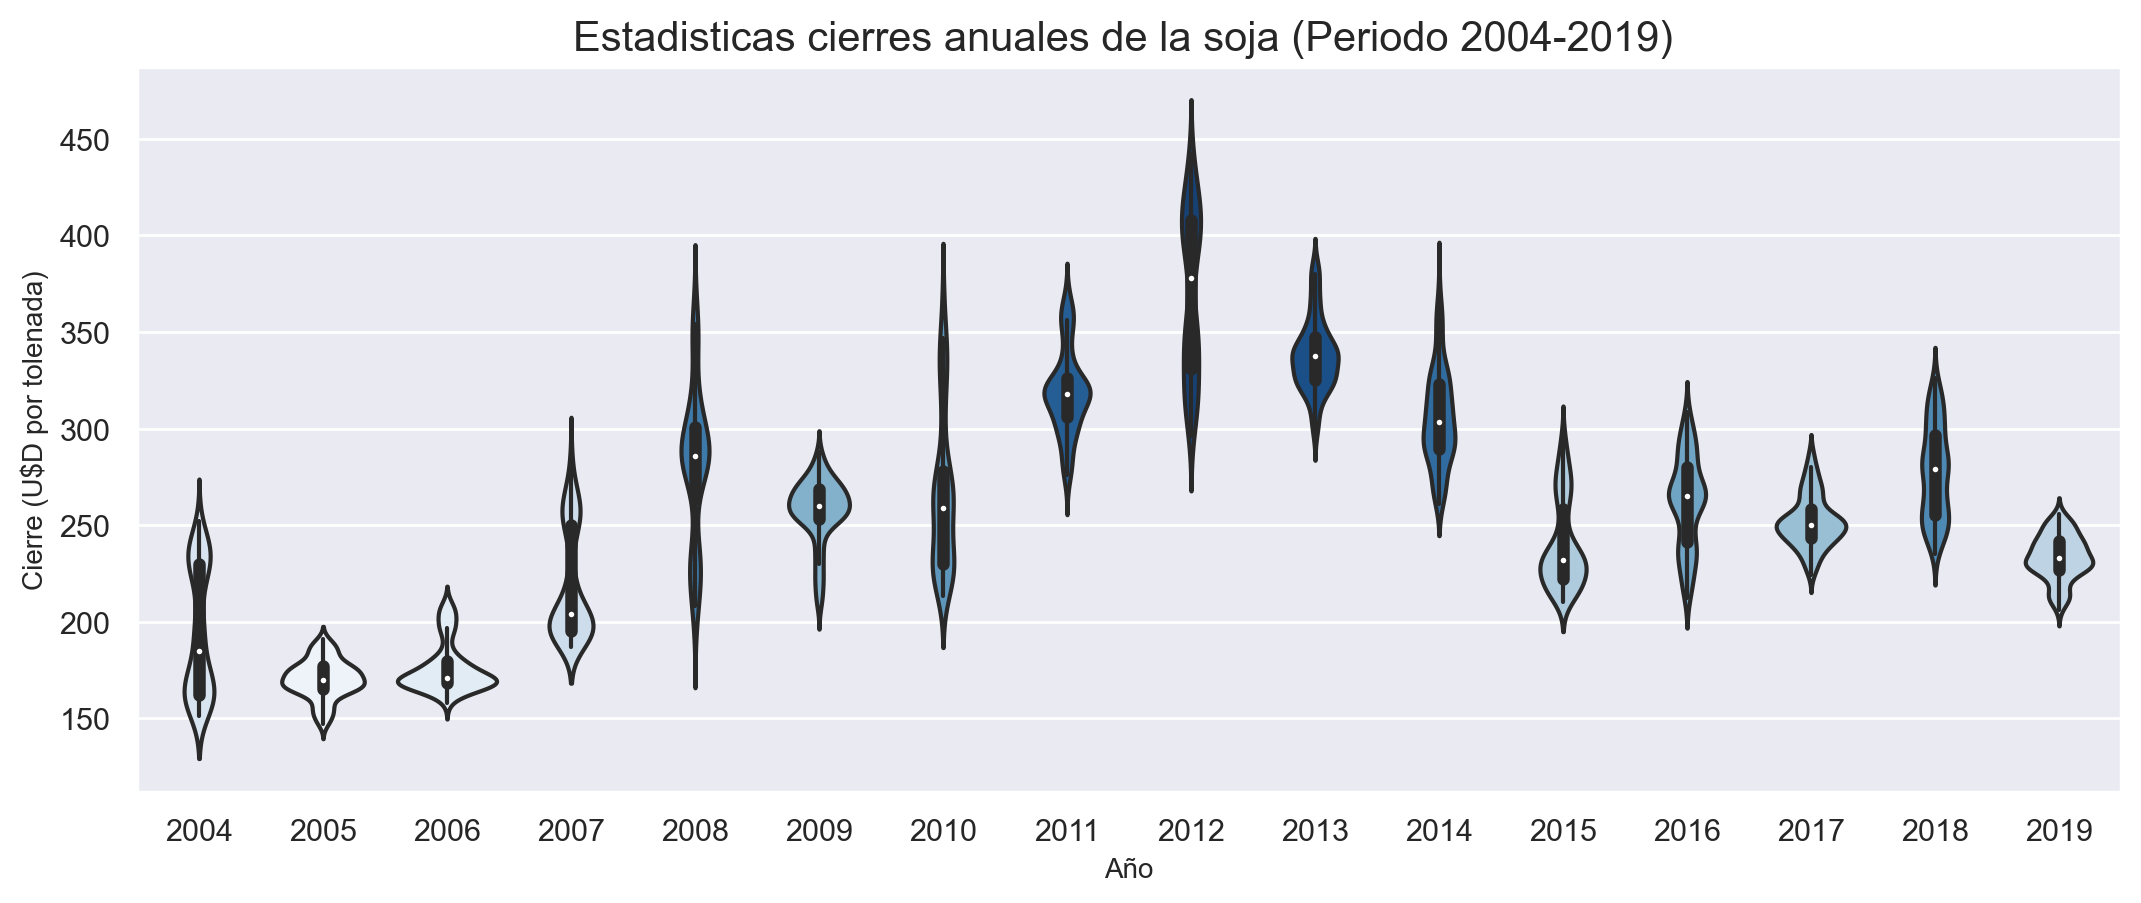

In [17]:
sns.set(rc={"figure.dpi":200})
sns.set(rc = {'figure.figsize':(12.8,4.8)})
ax = sns.violinplot(x="Año", y="Cierre", data=soja,palette=orden)
ax.set_ylabel("Cierre (U$D por tolenada)", fontsize = 10)
ax.set_xlabel("Año", fontsize = 10)
ax.set_title("Estadisticas cierres anuales de la soja (Periodo 2004-2019) ",size =15)
figure = ax.get_figure()    
figure.savefig('EstadisticasCierreAnual-Violin.png')